<a href="https://colab.research.google.com/github/Bijay2305/Azuredeployment/blob/main/twitter_data_analysis_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://www.kaggle.com/manovirat/aspect-based-sentiment-analysis
#https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/
#https://sites.temple.edu/tudsc/2017/03/30/measuring-similarity-between-texts-in-python/

# Adv https://github.com/dipanjanS/practical-machine-learning-with-python/blob/master/bonus%20content/nlp%20proven%20approach/NLP%20Strategy%20I%20-%20Processing%20and%20Understanding%20Text.ipynb
#https://towardsdatascience.com/a-practitioners-guide-to-natural-language-processing-part-i-processing-understanding-text-9f4abfd13e72
#https://medium.com/data-science-in-your-pocket/dependency-parsing-associated-algorithms-in-nlp-96d65dd95d3e
#https://towardsdatascience.com/named-entity-recognition-with-nltk-and-spacy-8c4a7d88e7da
#https://towardsdatascience.com/named-entity-recognition-with-nltk-and-spacy-8c4a7d88e7da
#https://monkeylearn.com/blog/named-entity-recognition/
#https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
import pandas as pd
import numpy as np
import re
import nltk
import spacy
import string
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import matplotlib.pyplot as plt 
from pattern.text.en import singularize
from wordcloud import WordCloud
from spellchecker import SpellChecker
from autocorrect import Speller
from nltk import word_tokenize
from textblob import TextBlob
import sys

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
#!{sys.executable} -m pip install contractions
from sklearn.cluster import KMeans

lemmatizer = WordNetLemmatizer()
pd.options.mode.chained_assignment = None
print("imported")
PUNCT_TO_REMOVE = string.punctuation
STOPWORDS = set(stopwords.words('english'))
", ".join(stopwords.words('english'))
cnt=Counter()
stemmer = PorterStemmer()

spell_corrector = SpellChecker()

def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

#df[new_text_col]=df[new_text_col].apply(lambda words :' '.join([stemmer.stem(word) for word in words.split()]))
print(stem_words("jumping"))
def lemma_word(text):
    return ' '.join([lemmatizer.lemmatize(word,"v") for word in text.split()])

print(lemma_word(" running"))
print(STOPWORDS)

imported
jump
run
{'off', 'over', 'and', 'can', 'll', "won't", 'above', "don't", 'against', 'which', 'before', "shan't", 'or', 'being', 'then', 'any', 'nor', "she's", 'yourself', 'mustn', "couldn't", 'my', 'd', 'own', 'these', 'further', 'do', "wouldn't", "doesn't", 'does', 'weren', 'we', 're', 'too', 'me', 'down', 'wouldn', 'there', "mustn't", 'needn', 'your', 'i', 'she', 'hadn', 'while', 'than', 'after', 'm', 'won', 'his', 'its', 'her', 'isn', 'shouldn', 'you', 'most', "needn't", 'theirs', 'again', 'here', 'the', 've', "you'll", 'those', 'should', 'so', 'few', 'some', "haven't", "isn't", "aren't", 'once', "hasn't", 'for', 'doesn', 'having', "it's", 'what', "hadn't", 'o', 'aren', 'themselves', 'are', 'have', 'ma', 'wasn', 'not', 'they', 'hasn', 'yours', 'same', 'y', 'from', 'by', 'about', 'when', 'himself', 'herself', 'very', 'in', 't', 'why', "should've", "shouldn't", 'didn', 'out', 'were', 'between', 'did', 's', 'each', "wasn't", 'until', 'as', 'ours', 'hers', 'during', 'he', 'a', '

In [ ]:
tweet_data=pd.read_csv(r"D:\DataScience\dataset\twcs.csv",nrows=500)
tweet_data.info()
#print(tweet_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 500 non-null    int64  
 1   author_id                500 non-null    object 
 2   inbound                  500 non-null    bool   
 3   created_at               500 non-null    object 
 4   text                     500 non-null    object 
 5   response_tweet_id        356 non-null    object 
 6   in_response_to_tweet_id  378 non-null    float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 24.1+ KB


In [ ]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [ ]:
missing_values_table(tweet_data)

Your selected dataframe has 7 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
response_tweet_id,144,28.8
in_response_to_tweet_id,122,24.4


In [ ]:
tweet_df=tweet_data[['text']]
#tweet_df=tweet_df['text'].astype(str)

In [ ]:

def remove_punctuation(text):
    return  text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

print(remove_stopwords("this is good"))

wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}

def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

def removal_of_htmltag(text):
    html_pattern = r'<.*?>'
    without_html =re.sub(pattern=html_pattern,repl='',string=text)
    return without_html
def remove_urls(text):
    url_pattern = r'https?://\S+|www\.\S+'
    without_url=re.sub(pattern=url_pattern,repl='',string=text)
    return without_url
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

print(lemmatize_words("there is heavily raining"))

def spell_autocorrect(text):
    correct_spell_words = []
    spell_corrector =Speller(lang='en')
    for word in word_tokenize(text):
        correct_word=spell_corrector(word)
        correct_spell_words.append(correct_word)
    
    auto_correct=" ".join(correct_spell_words)    
    return auto_correct

def spell_correction(text):
    # correct spells list
    correct_words=[]
    #extract incorrect words by using unknow functions of spell checker 
    misSpelled_words=spell_corrector.unknown(text.split())
    for each_word in text.split():
        if each_word in misSpelled_words:
            right_word=spell_corrector.correction(each_word)
            correct_words.append(right_word)
        else:
            
            correct_words.append(each_word)
    #    
    correct_spelling = ' '.join(correct_words)
    return correct_spelling

print(spell_correction("This ss an exampl sentence for spell corecton"))
print(spell_autocorrect("This ss an exampl sentence for spell corecton"))

def remove_extraspace(text):
    space_pattern =r'\s+'
    space_pattern = r'\s+'
    text=re.sub(pattern=space_pattern,repl=" ",string=text)
    return text
print(remove_extraspace("this is   a"))

good
there be heavily rain
This is an example sentence for spell correction
This ss an example sentence for spell correction
this is a


In [ ]:
def text_cleaning(df,text_col,new_text_col):
    
    #1 coverting lower case
    df[new_text_col]=df[text_col].str.lower()
    # removal of html tag
    df[new_text_col]=df[text_col].apply(removal_of_htmltag)
    df[new_text_col]=df[text_col].apply(remove_urls)
    #2 removing punctuation
    df[new_text_col]=df[new_text_col].apply(lambda text:remove_punctuation(text))
    #3 remove stop words
    df[new_text_col]=df[new_text_col].apply(lambda words:' '.join([word for word in words.split() if word not in STOPWORDS ]))
    
    #4 removal of numbers
    df[new_text_col]=df[new_text_col].str.replace('\d+','')
    
    for text in df[new_text_col].values:
        for word in text.split():
            cnt[word]+=1
    cnt.most_common(10)
    
    #print(cnt.most_common(10))
    FREQWORDS=set([w for (w,wc) in cnt.most_common(10)])
    n_rare_words = 15
    RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
    #5 removing the most frequent words
    df[new_text_col]=df[new_text_col].apply(lambda words :' '.join([word for word in words.split() if word not in FREQWORDS ]))
    #6 removing most rare words
    df[new_text_col]=df[new_text_col].apply(lambda words :' '.join([word for word in words.split() if word not in RAREWORDS ]))
    #7 Stemming which is rude way !!!!?
    #df[new_text_col]=df[new_text_col].apply(lambda words :' '.join([stemmer.stem(word) for word in words.split()]))   
    #8 remove the words whose length is less than 2
    df[new_text_col]=df[new_text_col].apply(lambda words :' '.join([word for word in words.split() if len(word)>2]))
    #9 lammatize the sentence 
    df[new_text_col]=df[new_text_col].apply(lambda text:lemmatize_words(text))
    df[new_text_col]=df[new_text_col].apply(lambda words:' '.join([singularize(word) for word in words.split()]))
    #df[new_text_col]=df[new_text_col].apply(lambda text: spell_correction(text))
    #df[new_text_col]=df[new_text_col].apply(lambda text: spell_autocorrect(text))
    df[new_text_col]=df[new_text_col].apply(lambda text:remove_extraspace(text))
    df[new_text_col]=df[new_text_col].apply(lambda text: str(TextBlob(text).correct()))
    #df[new_text_col]=df[new_text_col].reset_index()
        
    return df

In [ ]:
def text_analysis(input_data,text_col): 
    data=input_data[text_col].to_frame()
    #word_count : intuition : the negative sentiments contain a lesser amount of words than the positive ones.
    data["word_count"]=data[text_col].apply(lambda x:len(str(x).split(" ")))
    #Number of characters
    data["char_count"]=data[text_col].str.len()       
    #Average Word Length
    data['avg_word']=data[text_col].apply(lambda x:avg_word(x))
    # stop word count
    data['stop_words_count']=data[text_col].apply(lambda x:len([x for x in x.split() if x in STOPWORDS]))
    #Number of numerics
    data["numeric_count"]=data[text_col].apply(lambda x :len([x for x in x.split() if x.isdigit()]))
    #Number of Uppercase words
    data["Uppercase"]=data[text_col].apply(lambda x:len([x for x in x.split() if x.isupper()]))    
    #Number of special characters ???    
    return data

In [ ]:
import googletrans
'''
#print(googletrans.LANGUAGES)
from googletrans import Translator
translator = Translator()
result = translator.translate('Mitä sinä teet',src='en')
result

'''



"\n#print(googletrans.LANGUAGES)\nfrom googletrans import Translator\ntranslator = Translator()\nresult = translator.translate('Mitä sinä teet',src='en')\nresult\n\n"

In [ ]:
#tweet_df=text_analysis(tweet_df,'text')

tweet_df.head()

,text
0,@115712 I understand. I would like to assist y...
1,@sprintcare and how do you propose we do that
2,@sprintcare I have sent several private messag...
3,@115712 Please send us a Private Message so th...
4,@sprintcare I did.


In [ ]:
tweet_df_clean=text_cleaning(tweet_df,'text','text_clean')
tweet_df_clean.head()
#print(tweet_df_clean.head())

,text,text_clean
0,@115712 I understand. I would like to assist y...,understand would like assist would need get pr...
1,@sprintcare and how do you propose we do that,sprintcare propose
2,@sprintcare I have sent several private messag...,sprintcare send several private message one re...
3,@115712 Please send us a Private Message so th...,send Private Message assist Must click ‘Messag...
4,@sprintcare I did.,sprintcare


In [ ]:

from langdetect import detect
forg_lang ={}
no_lang= {}

#tweet_df_clean['text_clean']=tweet_df_clean['text_clean'].apply(detect)
for index, row in tweet_df_clean['text_clean'].iteritems():
    try:
        
        if detect(row[0])!= 'en':
            forg_lang[index]=row
            forg_lang[index].append(detect(row[0]))
    except:
        no_lang[index]=row

print(no_lang)   
df=pd.DataFrame(forg_lang.items())
print(df.head())
'''
lang = detect(row) #detecting each row
    tweet_df_clean.loc[index, 'Languagereveiw'] = lang
tweet_df_clean.head()

for row in reader:
    try:
        language = detect(row[0])
    except:
        language = "error"
        print("This row throws and error:", row[0])
    row.append(language)
    all.append(row)

'''
            
        

{0: 'understand would like assist would need get private secure link assist', 1: 'sprintcare propose', 2: 'sprintcare send several private message one respond usual', 3: 'send Private Message assist Must click ‘Message’ top profile', 4: 'sprintcare', 5: 'An please send private message gain detail account', 6: 'sprintcare bad customer service', 7: 'Hi sadden hear shoot look', 8: 'sprintcare You donna magically change conductivity whole family', 9: 'understand concern wed like please send Direct Message assist', 10: 'sprintcare Since sign youSince day', 11: 'Red definitely like work long experience issue', 12: 'y’all lie “great” connection bar LTE still won’t load something My', 13: 'send private message send link access account', 14: 'whenever contact customer support tell shortcode enable account never year Ve try', 15: 'That information incorrect', 16: 'AskSpectrum Would like email copy one since Spectrum update training', 17: 'my department part corporate office your particular area 

'\nlang = detect(row) #detecting each row\n    tweet_df_clean.loc[index, \'Languagereveiw\'] = lang\ntweet_df_clean.head()\n\nfor row in reader:\n    try:\n        language = detect(row[0])\n    except:\n        language = "error"\n        print("This row throws and error:", row[0])\n    row.append(language)\n    all.append(row)\n\n'

In [ ]:
documents=tweet_df_clean['text_clean'].tolist()
documents[:3]


['understand would like assist would need get private secure link assist',
 'sprintcare propose',
 'sprintcare send several private message one respond usual']

In [ ]:
from stanfordcorenlp import StanfordCoreNLP as scn
#nlp = scn(r'/path/to/stanford-corenlp-full-2017-06-09/')
sentence = 'His acting was good but script was poor'
print(nlp.pos_tag(sentence))

NameError: name 'nlp' is not defined

In [ ]:
def vectorize_texts(list_of_strings):
    print('Performing vectorization and TF/IDF transformation on texts...')
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(list_of_strings)
    transformer = TfidfTransformer(smooth_idf=False)
    tfidf = transformer.fit_transform(X)
    return tfidf

In [ ]:
def cluster_texts(num_clusters, tfidf):
    #perform kmeans clustering for range of clusters
    print('Beginning KMeans Clustering, number of clusters = ', num_clusters, '\n') 
    km = KMeans(n_clusters=num_clusters, max_iter = 100, verbose = 2, n_init = 1).fit(tfidf)     
    return km

In [ ]:
documents_vectorized = vectorize_texts(documents)
kmeans3 = cluster_texts(3, documents_vectorized)

Performing vectorization and TF/IDF transformation on texts...
Beginning KMeans Clustering, number of clusters =  3 

Initialization complete
Iteration  0, inertia 945.213
Iteration  1, inertia 482.822
Iteration  2, inertia 482.450
Iteration  3, inertia 482.356
Iteration  4, inertia 482.309
Converged at iteration 4: center shift 0.000000e+00 within tolerance 7.439060e-08


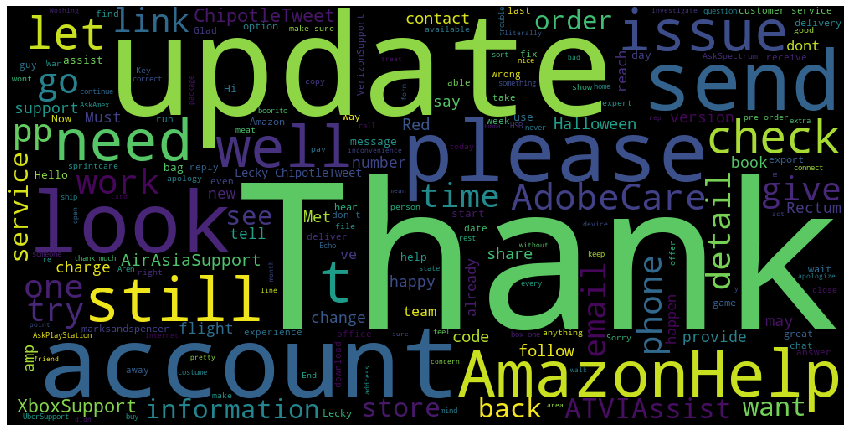

In [ ]:

word_list=tweet_df_clean['text_clean'].tolist()
#print(word_list)
unique_string=" ".join(word_list)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()



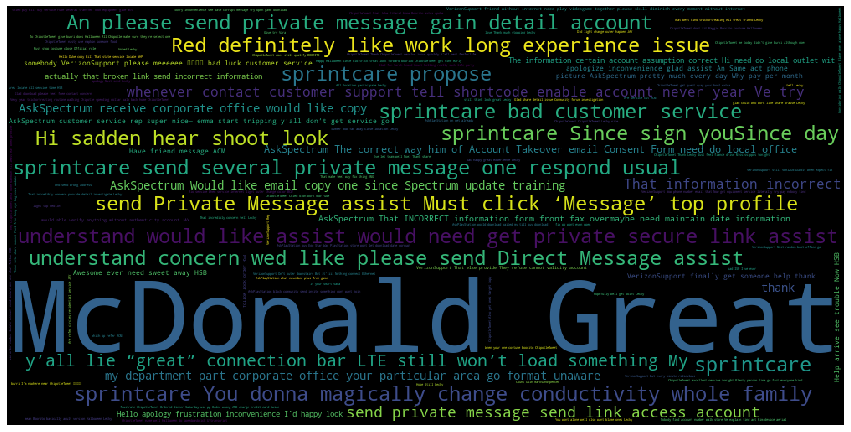

In [ ]:
word_could_dict=Counter(word_list)
wordcloud1 = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud1)
plt.axis("off")
#plt.show()
plt.savefig('wordcount.png', bbox_inches='tight')
plt.show()
plt.close()
